# Lab 01: First Steps with AI Programming

In this lab session, we will guide you to start AI programming.
This lab session includes:
- Google Colab introduction 
- Programming with TensorFlow Keras
  - Creating models
  - Creating custom dataset
  - Data augmentation
  - Train/evaluate/test model
  - Result analysis and visulization

Open in google colab -> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg#left)](https://colab.research.google.com/github/SuperChange001/deeplearning_labs/blob/main/Lab01/Lab01.ipynb)


# Set up TensorFlow
Import TensorFlow into your program to get started: 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Set the seed value for experiment reproducibility.
seed = 12
tf.random.set_seed(seed)
np.random.seed(seed)

Here we check if GPU is available. For this Lab session, it is not very critical, but for future Labs enabling GPU will make our life easier.


- To enable the GPU **Runtime** -> **Change runtime type** -> **Hardware accelerator** -> **GPU**.
- After you excute the code block below, you should see similiar output like: `PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]` 

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Create our First AI model
Let's first have a look at a very simple AI model, an [multilayer perceptron](https://www.sciencedirect.com/topics/computer-science/multilayer-perceptron):
![image](https://i.imgur.com/NQLAt6y.png)

three inputs `I1`, `I2`, and `I3` are directly fed into the so-called input layer while the column of blue nodes represents the hidden layer which contains 3 neurons. Then the last output layer with 2 neurons.

To create such an AI model with Keras we only need 7 lines of code:

In [3]:
model = keras.Sequential(
    [
        layers.Input(3, name="input_layer"),
        layers.Dense(3, activation="relu", name="hidden_layer_1"),
        layers.Dense(1, activation="sigmoid", name="ouput_layer"),
    ]
)

To check if the model is as expected, we can print a string summary of the network(model):



In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 3)                 12        
                                                                 
 ouput_layer (Dense)         (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


A quick example of how to feed data to the model and get the output:

In [5]:
inputs = [[1,2,3], [2,3,4]]

outputs = model.predict(inputs)

print("inputs\n", inputs)
print("\noutputs\n",outputs)

inputs
 [[1, 2, 3], [2, 3, 4]]

outputs
 [[0.39232117]
 [0.36232895]]


Even if you change the numbers above, the pattern between output its input will still look unrelated. Nevertheless, the behaviour of the untrained AI model is designed like this since its parameters are initialised with random numbers.

To train the model we need a data set. In the following section, we will first formulate a logic function and generate the dataset for training and testing our model.

# Logic Functions and its Truth Table
Therefore, we define a logic function as below: 

\begin{equation}
O=(\overline{I1} \cdot I2 \cdot I3)+(I1 \cdot \overline{I2} \cdot I3)+(I1 \cdot I2 \cdot \overline{I3})
\end{equation}

Here, `I1`, `I2` and `I3` are three independent inputs, and `O` is the only output. By feeding in all combinations of inputs we can build up the truth table of our logic function:


| I1| I2| I3| O |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 0 | 1 |
| 1 | 1 | 1 | 0 |

Now we can create the truth tables in Python, the prefix `x_` stands for the inputs and `y_` stands for expected output.

In [6]:
import numpy as np # the fundamental package for array computing with Python.

x_truth_table = np.array([[0,0,0], 
           [0,0,1], 
           [0,1,0], 
           [0,1,1], 
           [1,0,0], 
           [1,0,1], 
           [1,1,0], 
           [1,1,1]])
y_truth_table = np.array([[0],
           [0],
           [0],
           [1],
           [0],
           [1],
           [1],
           [0]])

# Data Augmentation
Though with only 8 entries of data is possible to train the AI model, it often fails. Therefore we prefer to generate more data from our defined truth table. One easy way to generate more data is by adding some noise to the existing data set.

1. we duplicate the data by [numpy.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html), to have enough enetries. 

*Tips: from the reference you will also find the meaning of `duplicate_factor`.*

In [7]:
import numpy as np

duplicate_factor_train = 60
noise_amplitude_factor = 0.2

x_duplicated = np.tile(x_truth_table,(duplicate_factor_train, 1))
y_duplicated = np.tile(y_truth_table,(duplicate_factor_train, 1))

print("The size of the data set in increased from %d to %d." %  (len(x_truth_table), len(x_duplicated)))

train_x = (x_duplicated.copy()+noise_amplitude_factor*np.random.random_sample(x_duplicated.shape)) # add noise
train_y = (y_duplicated.copy())

The size of the data set in increased from 8 to 480.


Among the training set `train_x`, `train_y`, we also need another two data sets for validation and testing.

In [8]:
# Building the validation set
duplicate_factor_val = 40
noise_amplitude_factor_val = 0.2

x_duplicated = np.tile(x_truth_table,(duplicate_factor_val, 1))
y_duplicated = np.tile(y_truth_table,(duplicate_factor_val, 1))

val_x = (x_duplicated.copy()+noise_amplitude_factor_val*np.random.random_sample(x_duplicated.shape))
val_y = (y_duplicated.copy())

# Building the test set
duplicate_factor_test = 20
noise_amplitude_factor_test = 0.2

x_duplicated = np.tile(x_truth_table,(duplicate_factor_test, 1))
y_duplicated = np.tile(y_truth_table,(duplicate_factor_test, 1))

test_x = (x_duplicated.copy()+noise_amplitude_factor_test*np.random.random_sample(x_duplicated.shape))
test_y = (y_duplicated.copy())

# Model Training
`epoches`: train the model by feeding the training set how many times?

`batch_size`: number of samples(rows in the `train_x`) that will be propagated through the network


In [9]:
epoches = 10
batch_size = 64

loss_function = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

model.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)

train_history = model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epoches,
    shuffle=True,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(val_x, val_y),
)

Epoch 1/10
8/8 [==============================] - 3s 28ms/step - loss: 0.7063 - accuracy: 0.5792 - val_loss: 0.7055 - val_accuracy: 0.6000
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 0.7035 - accuracy: 0.5917 - val_loss: 0.7030 - val_accuracy: 0.6094
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7008 - accuracy: 0.6021 - val_loss: 0.7004 - val_accuracy: 0.6156
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6981 - accuracy: 0.6062 - val_loss: 0.6979 - val_accuracy: 0.6156
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6958 - accuracy: 0.6167 - val_loss: 0.6954 - val_accuracy: 0.6156
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.6187 - val_loss: 0.6933 - val_accuracy: 0.6187
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.6187 - val_loss: 0.6912 - val_accuracy: 0.6250
Epoch 8/10
8/8 [=================

We can see from the log information that, the loss is decreasing with the accuracy arising during the training process. The records of loss and accuracy are also returned by the `fit()` method.

The code below fetches data from train_history and visualizes the accuracy and loss curves during training.

*Tips: [Interpreting Loss Curves](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic)*

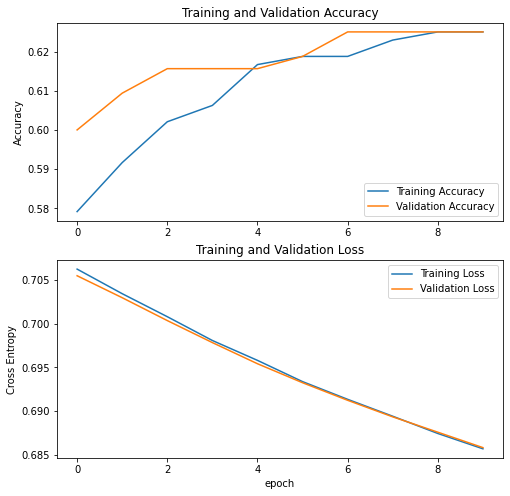

In [10]:
import matplotlib.pyplot as plt

# Define a function so we can reuse it later
def draw_learning_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

draw_learning_curves(train_history)

# Model Testing

`model.predict` is used to make the model predict output of the logic function.

The return value of this methods provides all the predictions on the test set.

In [11]:
y_pred = model.predict(test_x)
print(y_pred[:5]) # print the first 5 predicts

[[0.47536454]
 [0.45021793]
 [0.51582164]
 [0.4362071 ]
 [0.47317815]]


The predictions are all floating point number, but we want the model to predict either the output will be '1' or '0'. One way to solve it, is appling a threshold and mapping the floating number to binary data.

In [12]:
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

print(y_pred[:5]) # print first 5, for a quick check.
print(test_y[:5])

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[0]
 [0]
 [0]
 [1]
 [0]]


Another very popular way to visualize the test result is introducing the [confusion matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous). With confusion matrix, we can easily tell which class is misclassfied.

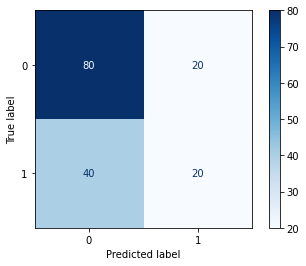

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


labels = ["0", "1"]

cm = confusion_matrix(test_y, y_pred)
# cm = confusion_matrix(test_y, y_pred, normalize="pred") # What the normalized confusion matrix will look like?

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

# Improvement
So far the trained model performs still not good, here are several aspects we can optimize to improve the model:
- [ ] larger dataset
- [ ] different model structure
  - [ ] more neurons
  - [ ] more layers
  - [ ] other activation functions
- [ ] training process
  - [ ] with more epochs, larger batch_size
  - [ ] other loss function
  - [ ] other evaluation metrics

## Create a larger data set

**Hint**: 
1. We need newly defined train_x, train_y, val_x, test_x, test_y
2. You can copy the code from ealy part
3. Try different `the duplicate_factor`, `noise_amplitude_factor` 

In [14]:
# Start Larger data set building





# End of Larger data set building

## Create the second model

**Hint**: 
1. Copy the code from the early part or you can try [other ways](https://keras.io/guides/sequential_model/) to create the model.
2. Change number of neurons and layers.
3. Play with different activation functions: `relu`,`sigmoid`,`tanh`,`elu`, ...

In [15]:
# Start creating the model_2



# End of creating the model_2

## Tweak the training process

**Hint**: 
1. Try different `epochs` and `batch_size` is the easiest thing, but the gain might be very little
2. Change `loss function` as another strategy, but need more effort
3. In addition, there are [many optimizers](https://keras.io/api/optimizers/) you can try, but you should adjust their parameters.
4. Shuffle the dataset during training.

In [16]:
# Start model training



# End of model training

## Plotting loss curve and accuracy curve during training

In [17]:
# Start loss curve



# End of loss curve

## Model testing and visualization the test result

In [18]:
# Start model test



# End of model test

# Save model
We finally trained a model with acceptable accuracy, we can port it to the hard disk.

In [19]:
model.save('model_logic_function.h5')

let's try to load the saved model and check if we saved it correctly.

In [20]:
saved_model = keras.models.load_model('model_logic_function.h5')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 3)                 12        
                                                                 
 ouput_layer (Dense)         (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
